In [27]:
import pandas as pd
import requests
from config import api_key
from citipy import citipy
import numpy as np
from matplotlib import pyplot as plt

url="http://api.openweathermap.org/data/2.5/weather?"

In [9]:
cities=[]

lats=np.random.uniform(high=-90, low=90, size=1500)
lons=np.random.uniform(high=-180, low=180, size=1500)
lats_lons=zip(lats,lons)
for value in lats_lons:
    city=citipy.nearest_city(value[0],value[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

598

In [10]:
r=requests.get(url=url, params={
    "q": "London",
    "appid":api_key
    }).json()

In [11]:
r

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 283.56,
  'feels_like': 277.68,
  'temp_min': 282.59,
  'temp_max': 285.15,
  'pressure': 999,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 7.2, 'deg': 260},
 'clouds': {'all': 75},
 'dt': 1600902394,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1600926619,
  'sunset': 1600970073},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [89]:
# cities=pd.read_csv("worldcities.csv")
# # city=cities["City"]
# city=cities[['City']].sample(550)
# # city_list=city.head(500)
# city_list=city["City"]
# city_list.str.title()

4573                   Deseronto
35700              Divnomorskoye
33210                      Gruiu
22613                       Auce
29335                    Palagao
                  ...           
37450                Oktyabrskiy
27484                     Bolboc
41432                   Ladyzhyn
8326     Trebechovice Pod Orebem
35539                      Butka
Name: City, Length: 550, dtype: object

In [90]:
# def extract(data):
#     return {
#         "city": data["name"],
#         "lat": data["coord"]["lat"],
#         "lon": data["coord"]["lon"],
#         "temp_k": data["main"]["temp"],
#         "humidity": data["main"]["humidity"],
#         "cloudiness": data["clouds"],
#         "wind_speed_mph": data["wind"]["speed"]
#     }

In [12]:
# city_results=[]
units="imperial"

In [13]:
query_url = url + "appid=" + api_key + "&units=" + units+"&q=" 

# query_url=url + params={
#     "q": "London",
#     "appid":api_key
#     }).json()
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=00adad221a4a334ddbbdcc7652023fdd&units=imperial&q=


In [20]:
num =1
city_name=[]
lat=[]
lon=[]
temp=[]
humidity=[]
cloudiness=[]
wind=[]
for city in cities:

    try:
        data=(requests.get(query_url+ city)).json()
        city_name.append(data["name"])
        lat.append(data["coord"]["lat"])
        lon.append(data["coord"]["lon"])
        temp.append(data["main"]["temp"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind.append(data["wind"]["speed"])
       
        
        num = num+1
        
    except KeyError:
        
        num= num+1

In [21]:
# city_name
# lat=[]
# lon=[]
# temp=[]
# humidity=[]
# cloudiness=[]
# wind=[]

df=pd.DataFrame({
    "City": city_name,
    "lat": lat,
    "lon": lon,
    "temp_k": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_mph": wind
})
df.head()

,City,lat,lon,temp_k,humidity,cloudiness,wind_mph
0,Ola,59.58,151.28,46.15,57,38,8.84
1,Saint-Pierre,-21.34,55.48,58.23,55,0,8.05
2,Bredasdorp,-34.53,20.04,44.60,93,0,4.70
3,Adrar,20.50,-10.07,97.39,19,78,15.35
4,Punta Arenas,-53.15,-70.92,48.96,57,75,35.57


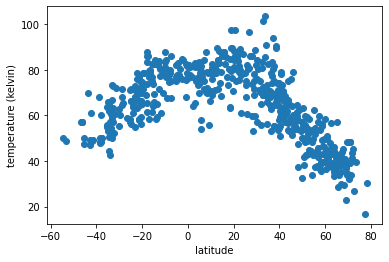

In [36]:
plt.scatter(lat, temp)
plt.xlabel("latitude")
plt.ylabel("temperature (kelvin)")
plt.show()

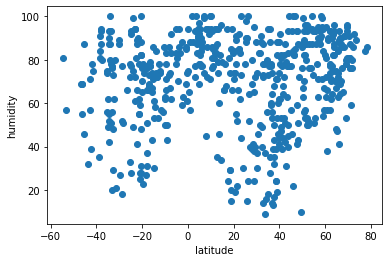

In [40]:
plt.scatter(lat, humidity)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()

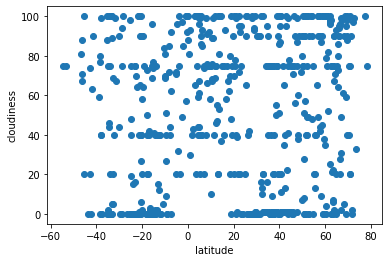

In [41]:
plt.scatter(lat, cloudiness)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()

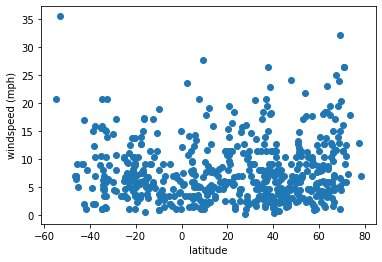

In [42]:
plt.scatter(lat, wind)
plt.xlabel("latitude")
plt.ylabel("windspeed (mph)")
plt.show()